In [1]:
!unzip "/content/default of credit card clients.xls.zip"

Archive:  /content/default of credit card clients.xls.zip
  inflating: default of credit card clients.xls  
  inflating: __MACOSX/._default of credit card clients.xls  


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
data = pd.read_excel('/content/default of credit card clients.xls', header=1)

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# Preprocess categorical columns
label_enc = LabelEncoder()
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

In [9]:
# Define features and target
X = data.drop(['ID', 'default payment next month'], axis=1)
y = data['default payment next month']

In [10]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train BaggingClassifier
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)

In [13]:
# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [14]:
# Train AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

In [15]:
# Train GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

In [16]:
# Train XGBoostClassifier
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
    return [model_name, accuracy, precision, recall, f1]

In [18]:
# Evaluate models
results = []
results.append(evaluate_model(y_test, bagging_pred, "BaggingClassifier"))
results.append(evaluate_model(y_test, rf_pred, "RandomForestClassifier"))
results.append(evaluate_model(y_test, adaboost_pred, "AdaBoostClassifier"))
results.append(evaluate_model(y_test, gbm_pred, "GradientBoostingClassifier"))
results.append(evaluate_model(y_test, xgb_pred, "XGBoostClassifier"))

Performance of BaggingClassifier:
Accuracy: 0.81
Precision: 0.63
Recall: 0.37
F1 Score: 0.46

Performance of RandomForestClassifier:
Accuracy: 0.82
Precision: 0.64
Recall: 0.37
F1 Score: 0.47

Performance of AdaBoostClassifier:
Accuracy: 0.82
Precision: 0.68
Recall: 0.32
F1 Score: 0.43

Performance of GradientBoostingClassifier:
Accuracy: 0.82
Precision: 0.67
Recall: 0.35
F1 Score: 0.46

Performance of XGBoostClassifier:
Accuracy: 0.82
Precision: 0.64
Recall: 0.38
F1 Score: 0.47



In [19]:
# Create results dataframe
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

                        Model  Accuracy  Precision    Recall  F1 Score
0           BaggingClassifier  0.815000   0.634082  0.365575  0.463768
1      RandomForestClassifier  0.816000   0.638411  0.367098  0.466151
2          AdaBoostClassifier  0.818167   0.680195  0.319117  0.434422
3  GradientBoostingClassifier  0.820000   0.667145  0.354151  0.462687
4           XGBoostClassifier  0.816667   0.637419  0.376238  0.473180


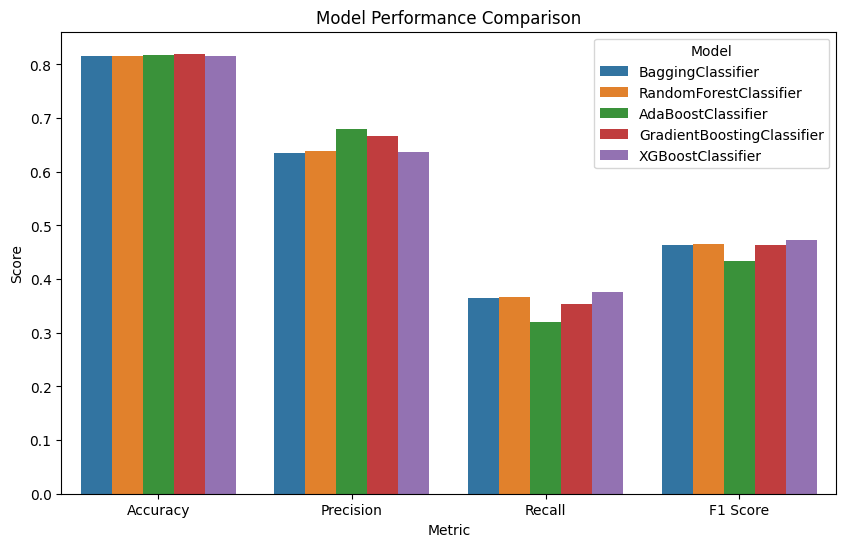

In [20]:
# Visualize performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.show()

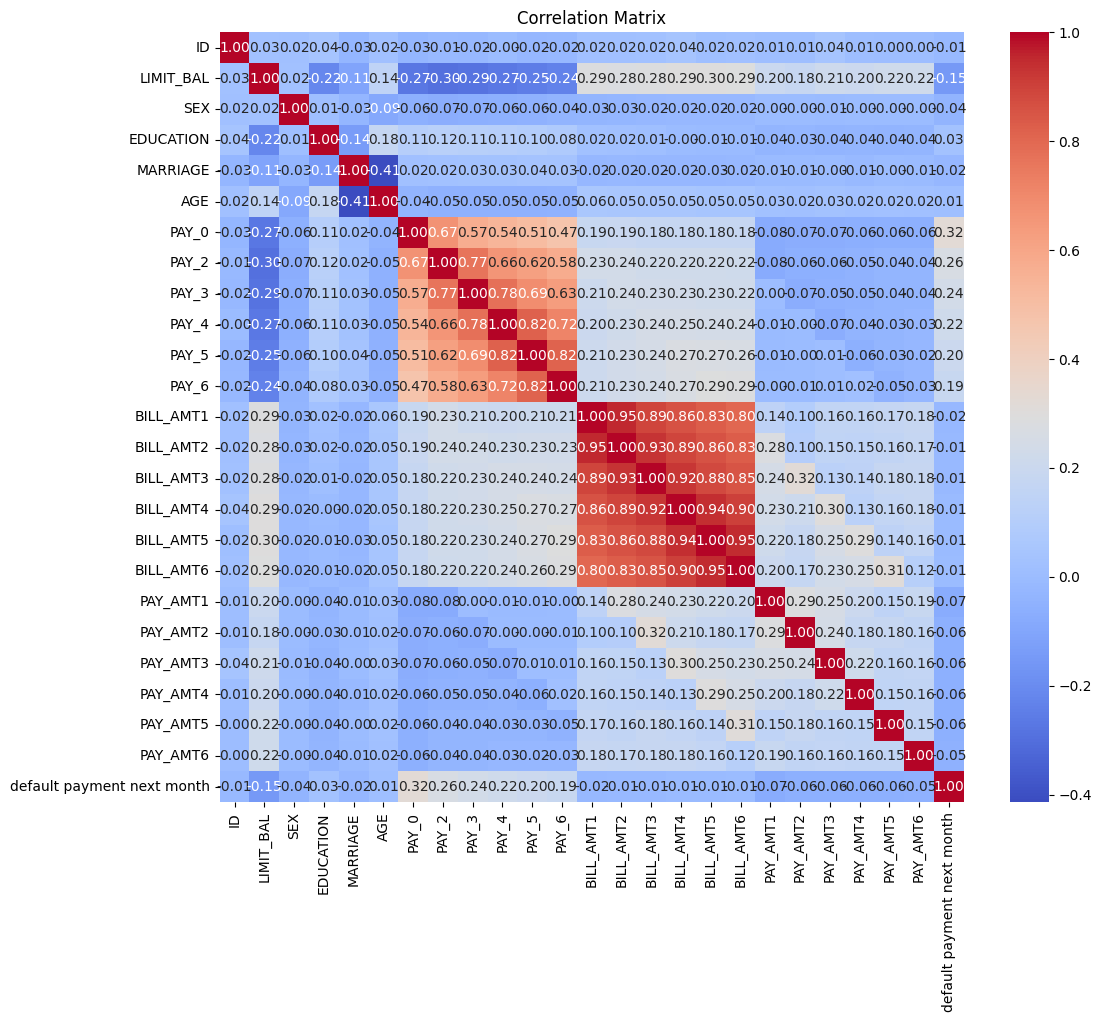

In [21]:
# Visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

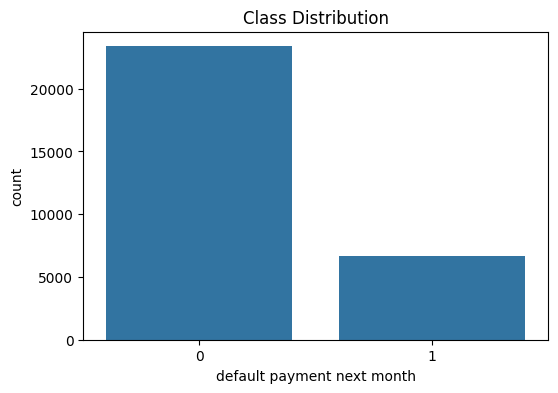

In [22]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=data)
plt.title('Class Distribution')
plt.show()

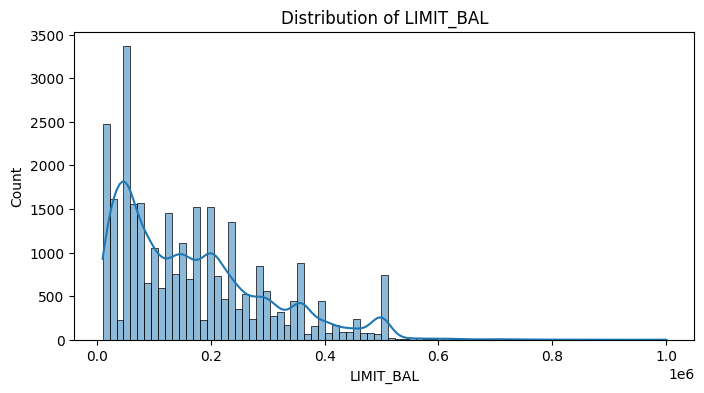

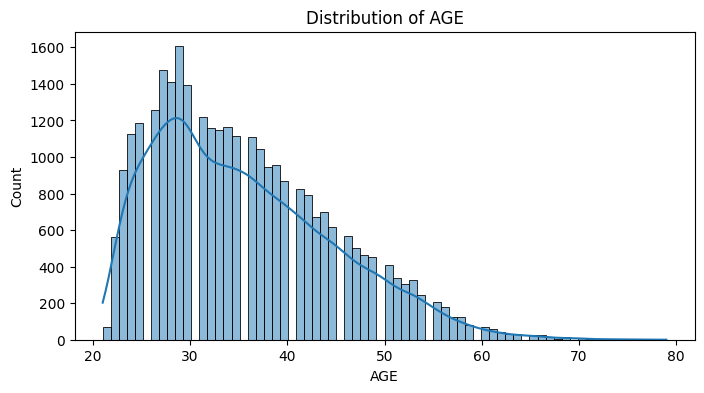

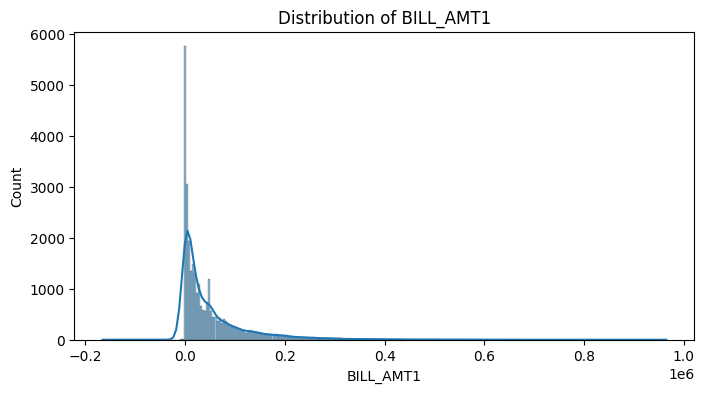

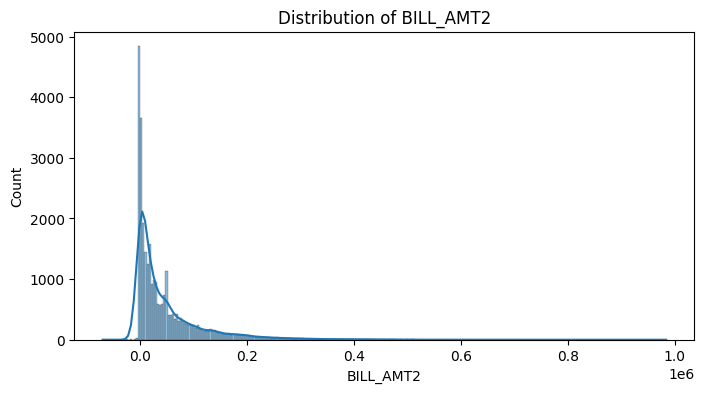

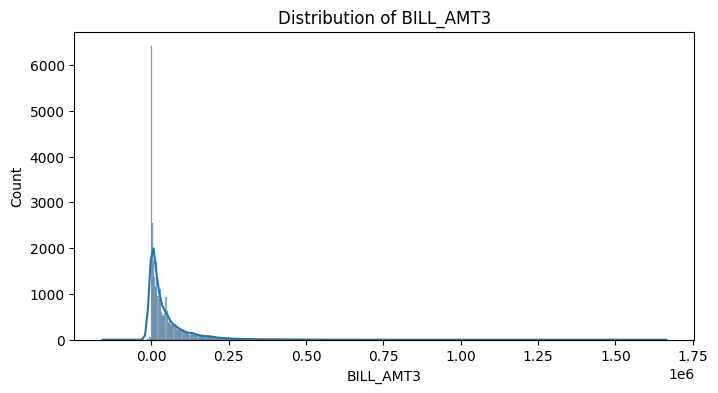

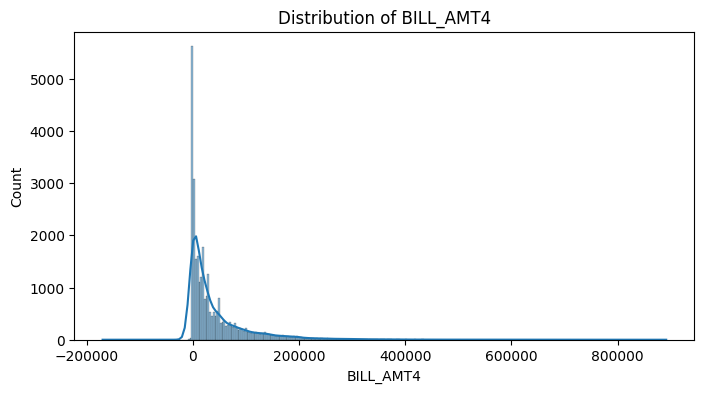

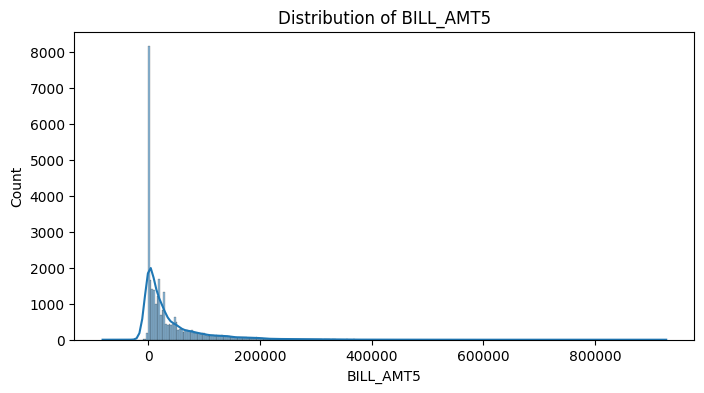

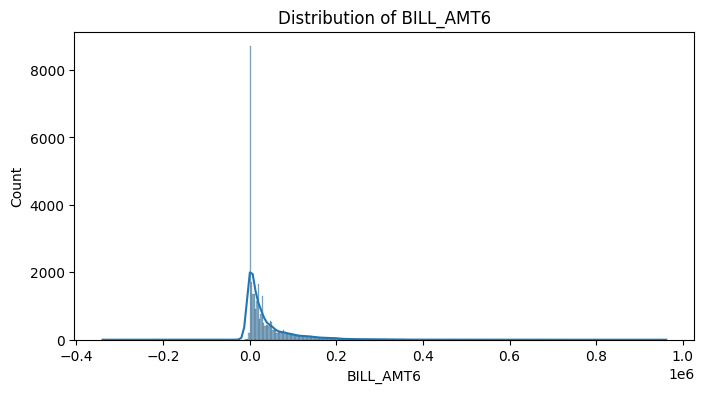

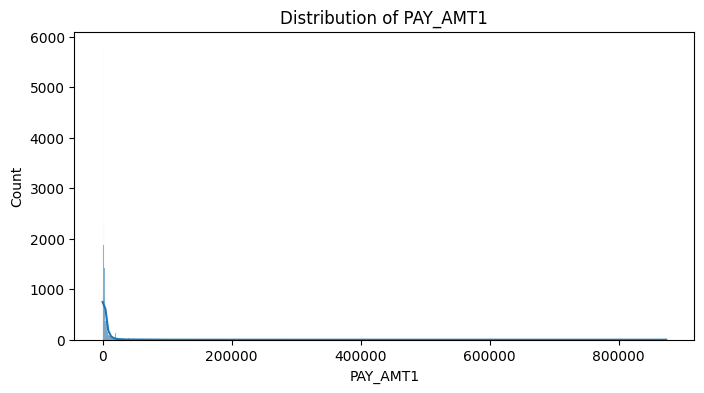

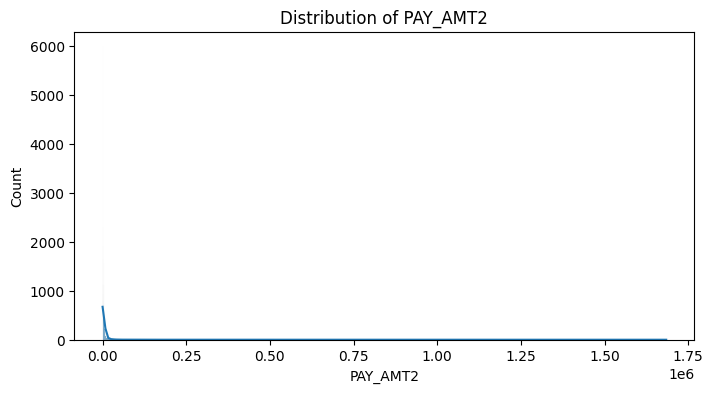

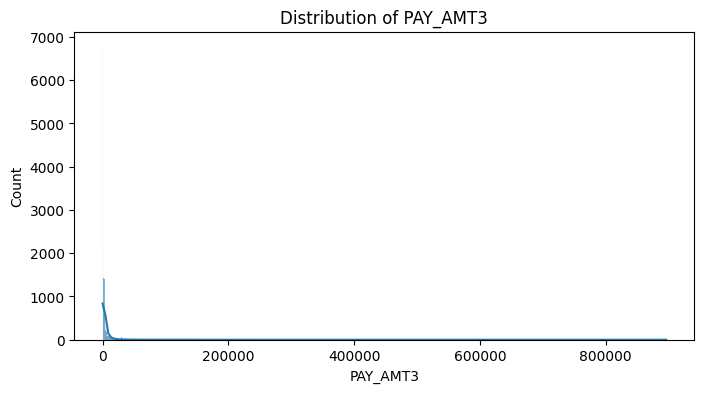

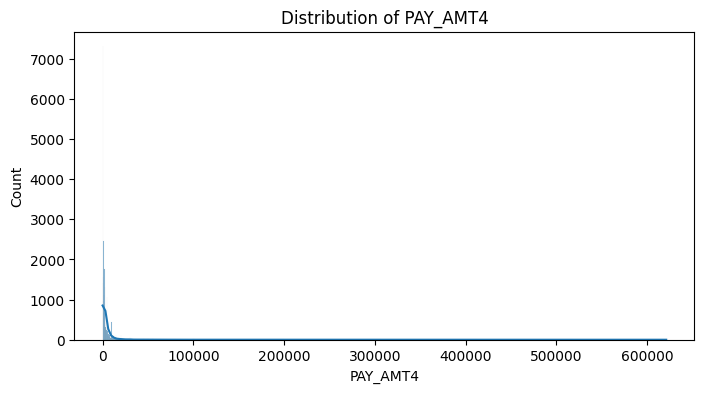

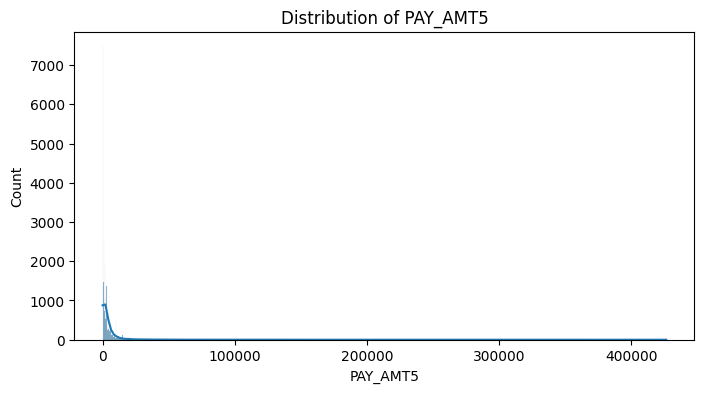

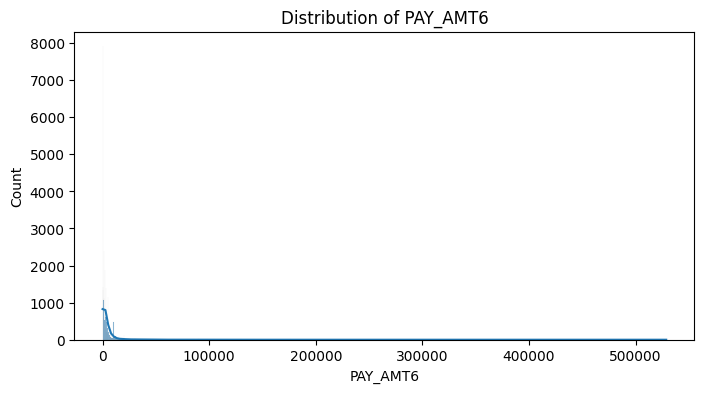

In [23]:
# Visualize feature distributions
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

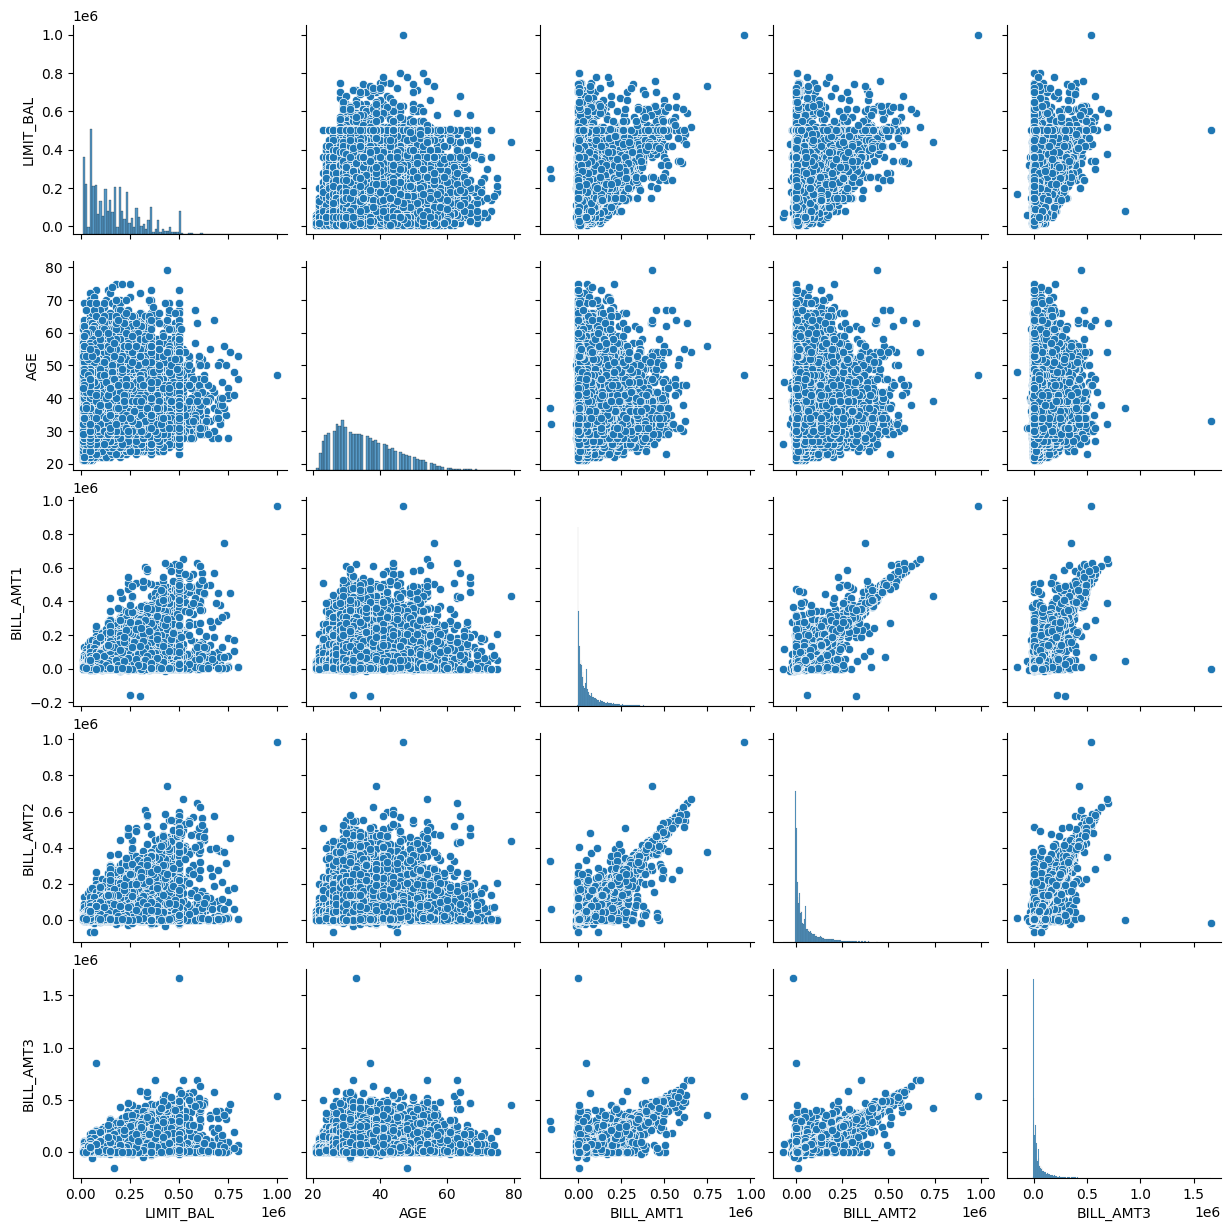

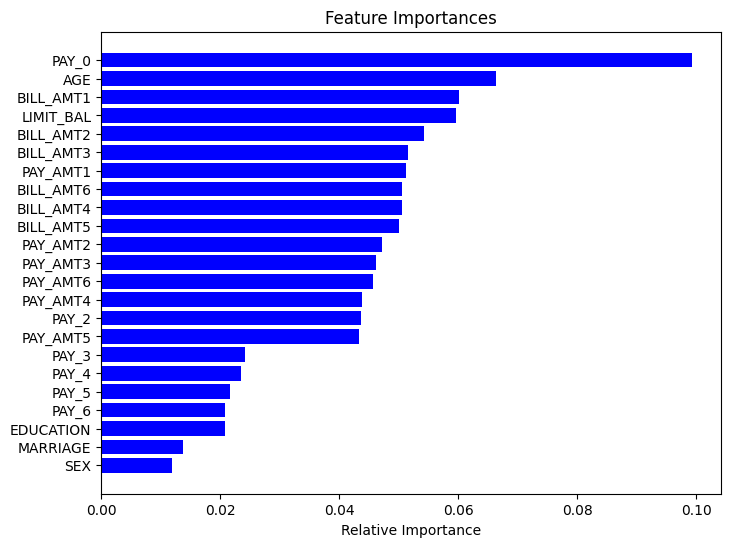

In [25]:
#pairplot to see relationships
sns.pairplot(data[numerical_cols[:5]])
plt.show()

#feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()